In [281]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from glob import glob

In [184]:
change_sgg_data = {
    '23030': {'시군구':'미추홀구', '시군구코드':'23090'},
    '33010': {'시군구':'청주시', '시군구코드':'33040'}, # 2014년 청주시 + 청원군 통합
    '33310': {'시군구':'청주시', '시군구코드':'33040'},
    '29' : {'시군구':'세종시', '시군구코드':'29010'}
} 

change_sgg_le_data = {
    '28170':{'시군구':'미추홀구', '시군구코드':'28177'}
}

In [24]:
sido_cd_nm = {
    '11' : '서울특별시',
    '21' : '부산광역시',
    '22' : '대구광역시',
    '23' : '인천광역시',
    '24' : '광주광역시',
    '25' : '대전광역시',
    '26' : '울산광역시',
    '29' : '세종특별자치시',
    '31' : '경기도',
    '32' : '강원도',
    '33' : '충청북도',
    '34' : '충청남도',
    '35' : '전라북도',
    '36' : '전라남도',
    '37' : '경상북도',
    '38' : '경상남도',
    '39' : '제주특별자치도',
}

sido_abbr_nm = {
    '서울' : '서울특별시',
    '부산' : '부산광역시',
    '대구' : '대구광역시',
    '인천' : '인천광역시',
    '광주' : '광주광역시',
    '대전' : '대전광역시',
    '울산' : '울산광역시',
    '세종' : '세종특별자치시',
    '경기' : '경기도',
    '강원' : '강원도',
    '충북' : '충청북도',
    '충남' : '충청남도',
    '전북' : '전라북도',
    '전남' : '전라남도',
    '경북' : '경상북도',
    '경남' : '경상남도',
    '제주' : '제주특별자치도',
}

## 대상 시군구

In [77]:
import geopandas as gpd

sgg_gdf = gpd.gpd.GeoDataFrame.from_file('../data/0/shp/sgg.shp', encoding='UTF-8', crs="epsg:4326")
sgg_gdf = sgg_gdf.astype({'SGG_AD_CD':str,'SGG_LE_CD':str})
sgg_gdf

,SGG_AD_CD,SGG_LE_CD,SIDO,SGG,geometry
0,11010,11110,서울특별시,종로구,"POLYGON ((126.94890 37.62325, 126.94890 37.623..."
1,11020,11140,서울특별시,중구,"POLYGON ((126.96155 37.55860, 126.96155 37.558..."
2,11030,11170,서울특별시,용산구,"POLYGON ((126.94459 37.53378, 126.94460 37.533..."
3,11040,11200,서울특별시,성동구,"POLYGON ((127.00815 37.54506, 127.00817 37.545..."
4,11050,11215,서울특별시,광진구,"POLYGON ((127.05622 37.52832, 127.05623 37.528..."
...,...,...,...,...,...
224,38380,48870,경상남도,함양군,"POLYGON ((127.58486 35.55391, 127.58488 35.553..."
225,38390,48880,경상남도,거창군,"POLYGON ((127.67944 35.76850, 127.67945 35.768..."
226,38400,48890,경상남도,합천군,"POLYGON ((127.95323 35.53403, 127.95323 35.534..."
227,39010,50110,제주특별자치도,제주시,"MULTIPOLYGON (((126.94125 33.50648, 126.94125 ..."


In [324]:
sgg_df = sgg_gdf[['SGG_AD_CD','SIDO','SGG']].copy()
sgg_df = sgg_df.rename(columns={'SGG_AD_CD':'시군구코드','SIDO':'시도','SGG':'시군구'})

sgg_df

,시군구코드,시도,시군구
0,11010,서울특별시,종로구
1,11020,서울특별시,중구
2,11030,서울특별시,용산구
3,11040,서울특별시,성동구
4,11050,서울특별시,광진구
...,...,...,...
224,38380,경상남도,함양군
225,38390,경상남도,거창군
226,38400,경상남도,합천군
227,39010,제주특별자치도,제주시


In [310]:
le_2_ad_sgg_cd = {}
ad_2_le_sgg_cd = {}

for i in sgg_gdf.index:
    le_cd = sgg_gdf['SGG_LE_CD'][i]
    ad_cd = sgg_gdf['SGG_AD_CD'][i]
    
    le_2_ad_sgg_cd[le_cd] = ad_cd
    ad_2_le_sgg_cd[ad_cd] = le_cd
    
le_2_ad_sgg_cd

{'11110': '11010',
 '11140': '11020',
 '11170': '11030',
 '11200': '11040',
 '11215': '11050',
 '11230': '11060',
 '11260': '11070',
 '11290': '11080',
 '11305': '11090',
 '11320': '11100',
 '11350': '11110',
 '11380': '11120',
 '11410': '11130',
 '11440': '11140',
 '11470': '11150',
 '11500': '11160',
 '11530': '11170',
 '11545': '11180',
 '11560': '11190',
 '11590': '11200',
 '11620': '11210',
 '11650': '11220',
 '11680': '11230',
 '11710': '11240',
 '11740': '11250',
 '26110': '21010',
 '26140': '21020',
 '26170': '21030',
 '26200': '21040',
 '26230': '21050',
 '26260': '21060',
 '26290': '21070',
 '26320': '21080',
 '26350': '21090',
 '26380': '21100',
 '26410': '21110',
 '26440': '21120',
 '26470': '21130',
 '26500': '21140',
 '26530': '21150',
 '26710': '21310',
 '27110': '22010',
 '27140': '22020',
 '27170': '22030',
 '27200': '22040',
 '27230': '22050',
 '27260': '22060',
 '27290': '22070',
 '27710': '22310',
 '28110': '23010',
 '28140': '23020',
 '28185': '23040',
 '28200': '2

In [78]:
sgg_ad_cd = list(sgg_gdf['SGG_AD_CD'].unique())
sgg_le_cd = list(sgg_gdf['SGG_LE_CD'].unique())

sgg_ad_cd

['11010',
 '11020',
 '11030',
 '11040',
 '11050',
 '11060',
 '11070',
 '11080',
 '11090',
 '11100',
 '11110',
 '11120',
 '11130',
 '11140',
 '11150',
 '11160',
 '11170',
 '11180',
 '11190',
 '11200',
 '11210',
 '11220',
 '11230',
 '11240',
 '11250',
 '21010',
 '21020',
 '21030',
 '21040',
 '21050',
 '21060',
 '21070',
 '21080',
 '21090',
 '21100',
 '21110',
 '21120',
 '21130',
 '21140',
 '21150',
 '21310',
 '22010',
 '22020',
 '22030',
 '22040',
 '22050',
 '22060',
 '22070',
 '22310',
 '23010',
 '23020',
 '23040',
 '23050',
 '23060',
 '23070',
 '23080',
 '23090',
 '23310',
 '23320',
 '24010',
 '24020',
 '24030',
 '24040',
 '24050',
 '25010',
 '25020',
 '25030',
 '25040',
 '25050',
 '26010',
 '26020',
 '26030',
 '26040',
 '26310',
 '29010',
 '31010',
 '31020',
 '31030',
 '31040',
 '31050',
 '31060',
 '31070',
 '31080',
 '31090',
 '31100',
 '31110',
 '31120',
 '31130',
 '31140',
 '31150',
 '31160',
 '31170',
 '31180',
 '31190',
 '31200',
 '31210',
 '31220',
 '31230',
 '31240',
 '31250',


In [203]:
len(sgg_ad_cd)

229

## 인구 : 인구 정태
### 총인구

In [88]:
popul_data_file = glob('../data/2/population/popul_20*.xlsx')

popul_df_list = []

for file in popul_data_file:
    popul_df = pd.read_excel(file)
    popul_df_list.append(popul_df)
    
popul_dfs = pd.concat(popul_df_list).reset_index().drop(columns=['index'])

popul_dfs.columns = [' '.join(i.split(' ')[1:]) for i in popul_dfs.columns]

## 행정구역 데이터 정리
popul_dfs['시군구'] = popul_dfs['행정구역(시군구)별'].apply(lambda x:x.split(' ')[1])
popul_dfs['시군구코드'] = popul_dfs['행정구역(시군구)별'].apply(lambda x:x.split(' ')[0].strip())
popul_dfs['시군구코드'] = popul_dfs.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
popul_dfs['시도코드'] = popul_dfs['시군구코드'].apply(lambda x:str(x)[:2])
popul_dfs['시도'] = popul_dfs['시도코드'].apply(lambda x: sido_cd_nm[x])

popul_dfs['시점'] = popul_dfs['시점'].apply(lambda x:int(x.split(' ')[1]))
popul_dfs = popul_dfs[popul_dfs['시점']<2019]

popul_dfs = popul_dfs[['시점', '시도코드','시군구코드', '시도','시군구', '계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상', 
       ]]

popul_dfs = popul_dfs.loc[popul_dfs['시군구코드'].isin(sgg_ad_cd)].reset_index().drop(columns=['index'])

popul_dfs['영유아_어린이_인구'] = popul_dfs[['0 - 4세', '5 - 9세', '10 - 14세']].sum(axis=1)
popul_dfs['청소년_인구'] = popul_dfs[['15 - 19세']].sum(axis=1)
popul_dfs['고령인구'] = popul_dfs[['65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상']].sum(axis=1)

popul_dfs['영유아_어린이_인구_비율'] = popul_dfs['영유아_어린이_인구'] / popul_dfs['계']
popul_dfs['청소년_인구_비율'] = popul_dfs['청소년_인구'] / popul_dfs['계']
popul_dfs['고령인구_비율'] = popul_dfs['고령인구'] / popul_dfs['계']

popul_dfs

,시점,시도코드,시군구코드,시도,시군구,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,...,85 - 89세,90 - 94세,95 - 99세,100세 이상,영유아_어린이_인구,청소년_인구,고령인구,영유아_어린이_인구_비율,청소년_인구_비율,고령인구_비율
0,2014,11,11010,서울특별시,종로구,153407.0,4499.0,5037.5,6883.5,9119.0,...,1203.5,481.0,97.0,15.0,16420.0,9119.0,22475.0,0.107036,0.059443,0.146506
1,2014,11,11020,서울특별시,중구,125273.0,4673.0,4007.0,4290.5,5945.0,...,950.0,338.5,76.0,7.5,12970.5,5945.0,18201.0,0.103538,0.047456,0.145291
2,2014,11,11030,서울특별시,용산구,229055.0,9168.5,8590.0,9504.0,11815.0,...,1658.5,583.0,119.5,21.0,27262.5,11815.0,31440.5,0.119022,0.051581,0.137262
3,2014,11,11040,서울특별시,성동구,292786.5,12388.0,11351.0,12266.5,15649.0,...,1519.5,558.0,120.0,18.0,36005.5,15649.0,34756.0,0.122975,0.053449,0.118708
4,2014,11,11050,서울특별시,광진구,361146.5,13637.5,13086.0,16138.0,21792.0,...,1650.5,626.0,134.0,21.5,42861.5,21792.0,37060.0,0.118682,0.060341,0.102618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2018,38,38380,경상남도,함양군,39778.0,932.0,1216.0,1453.0,1894.0,...,1112.0,392.5,75.0,15.0,3601.0,1894.0,12508.5,0.090527,0.047614,0.314458
1141,2018,38,38390,경상남도,거창군,62244.5,1815.0,2499.5,2616.5,3499.5,...,1409.0,449.5,95.0,21.5,6931.0,3499.5,16009.0,0.111351,0.056222,0.257195
1142,2018,38,38400,경상남도,합천군,46005.5,822.0,1087.0,1227.5,1769.0,...,1515.5,440.5,108.5,7.0,3136.5,1769.0,16988.5,0.068177,0.038452,0.369271
1143,2018,39,39010,제주특별자치도,제주시,478282.0,22155.5,26209.0,26115.5,30170.5,...,4676.0,1516.5,655.0,76.0,74480.0,30170.5,61855.5,0.155724,0.063081,0.129329


### 여성인구

In [113]:
w_popul_data_file = glob('../data/2/population/popul_w*.xlsx')

w_popul_df_list = []

for file in w_popul_data_file:
    w_popul_df = pd.read_excel(file)
    w_popul_df_list.append(w_popul_df)
    
w_popul_dfs = pd.concat(w_popul_df_list).reset_index().drop(columns=['index'])

w_popul_dfs.columns = [' '.join(i.split(' ')[1:]) for i in w_popul_dfs.columns]

## 행정구역 데이터 정리
w_popul_dfs['시군구'] = w_popul_dfs['행정구역(시군구)별'].apply(lambda x:x.split(' ')[1])
w_popul_dfs['시군구코드'] = w_popul_dfs['행정구역(시군구)별'].apply(lambda x:x.split(' ')[0].strip())
w_popul_dfs['시군구코드'] = w_popul_dfs.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
w_popul_dfs['시도코드'] = w_popul_dfs['시군구코드'].apply(lambda x:str(x)[:2])
w_popul_dfs['시도'] = w_popul_dfs['시도코드'].apply(lambda x: sido_cd_nm[x])

w_popul_dfs['시점'] = w_popul_dfs['시점'].apply(lambda x:int(x.split(' ')[1]))
w_popul_dfs = w_popul_dfs[w_popul_dfs['시점']<2019]

w_popul_dfs = w_popul_dfs[['시점', '시도코드','시군구코드', '시도','시군구', '계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상', 
       ]]



w_popul_dfs = w_popul_dfs.loc[w_popul_dfs['시군구코드'].isin(sgg_ad_cd)].reset_index().drop(columns=['index'])

w_popul_dfs['여성_영유아_어린이_인구'] = w_popul_dfs[['0 - 4세', '5 - 9세', '10 - 14세']].sum(axis=1)
w_popul_dfs['여성_청소년_인구'] = w_popul_dfs[['15 - 19세']].sum(axis=1)
w_popul_dfs['여성_고령인구'] = w_popul_dfs[['65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상']].sum(axis=1)

w_popul_dfs['여성_영유아_어린이_인구_비율'] = w_popul_dfs['여성_영유아_어린이_인구'] / w_popul_dfs['계']
w_popul_dfs['여성_청소년_인구_비율'] = w_popul_dfs['여성_청소년_인구'] / w_popul_dfs['계']
w_popul_dfs['여성_고령인구_비율'] = w_popul_dfs['여성_고령인구'] / w_popul_dfs['계']

w_popul_dfs = w_popul_dfs.rename(columns={'계':'여성_계'})

w_popul_dfs

,시점,시도코드,시군구코드,시도,시군구,여성_계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,...,85 - 89세,90 - 94세,95 - 99세,100세 이상,여성_영유아_어린이_인구,여성_청소년_인구,여성_고령인구,여성_영유아_어린이_인구_비율,여성_청소년_인구_비율,여성_고령인구_비율
0,2014,11,11010,서울특별시,종로구,77442.5,2175.5,2402.5,3296.5,4362.5,...,810.0,332.5,74.0,11.5,7874.5,4362.5,12632.0,0.101682,0.056332,0.163115
1,2014,11,11020,서울특별시,중구,62726.0,2276.5,2004.5,2079.0,2872.0,...,683.5,237.5,52.0,6.0,6360.0,2872.0,10476.5,0.101393,0.045786,0.167020
2,2014,11,11030,서울특별시,용산구,117561.5,4521.5,4273.0,4629.5,5579.0,...,1157.0,413.0,80.0,16.0,13424.0,5579.0,18223.0,0.114187,0.047456,0.155008
3,2014,11,11040,서울특별시,성동구,147137.5,6052.0,5532.0,6107.0,7693.5,...,1083.5,403.0,92.5,14.5,17691.0,7693.5,19676.5,0.120234,0.052288,0.133729
4,2014,11,11050,서울특별시,광진구,183576.5,6633.0,6445.0,7736.0,10620.0,...,1178.0,463.0,114.0,15.5,20814.0,10620.0,20520.5,0.113381,0.057851,0.111782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2018,38,38380,경상남도,함양군,20703.5,473.5,579.5,689.5,924.0,...,860.0,300.0,62.0,12.0,1742.5,924.0,7799.5,0.084165,0.044630,0.376724
1141,2018,38,38390,경상남도,거창군,32003.0,878.0,1186.5,1258.0,1635.5,...,1024.5,344.0,78.0,16.5,3322.5,1635.5,9890.0,0.103818,0.051105,0.309034
1142,2018,38,38400,경상남도,합천군,23954.0,384.5,528.0,592.0,828.5,...,1130.0,345.0,97.0,7.0,1504.5,828.5,10654.5,0.062808,0.034587,0.444790
1143,2018,39,39010,제주특별자치도,제주시,237939.0,10695.0,12723.0,12483.5,14289.0,...,3591.0,1318.0,595.0,72.5,35901.5,14289.0,36274.0,0.150885,0.060053,0.152451


## 인구 이동 : 인구 동태

### 인위적 인구감소
 
□ 데이터 범위
  - 2014 - 2018
 
□ 데이터 출처
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B26001_A01&conn_path=I2

In [313]:
popul_move_dfs = pd.read_excel('../data/2/popul_move/popul_move.xlsx')

popul_move_dfs.columns = [' '.join(i.split(' ')[1:]) for i in popul_move_dfs.columns]

## 행정구역 데이터 정리
popul_move_dfs['시점'] = popul_move_dfs['시점'].apply(lambda x:int(x.split(' ')[1]))
popul_move_dfs['시군구'] = popul_move_dfs['행정구역(시군구)별'].apply(lambda x:x.split(' ')[1])
popul_move_dfs['법정_시군구코드'] = popul_move_dfs['행정구역(시군구)별'].apply(lambda x:x.split(' ')[0].strip())
popul_move_dfs['법정_시군구코드'] = popul_move_dfs.apply(lambda x: change_sgg_le_data[x['법정_시군구코드']]['시군구코드'] if x['법정_시군구코드'] in change_sgg_le_data else x['법정_시군구코드'], axis=1)
popul_move_dfs['법정_시도코드'] = popul_move_dfs['법정_시군구코드'].apply(lambda x:str(x)[:2])

popul_move_dfs = popul_move_dfs.loc[popul_move_dfs['법정_시군구코드'].isin(sgg_le_cd)].reset_index().drop(columns=['index'])

popul_move_dfs['시군구코드'] = popul_move_dfs['법정_시군구코드'].apply(lambda x:le_2_ad_sgg_cd[str(x)])
popul_move_dfs = popul_move_dfs.rename(columns={'총전입 (14STD04553 명)':'총전입_명', '총전출 (14STD04553 명)':'총전출_명'})
# 인천 남구 -> 인천 미추홀구 변경이 18년 중반에 되버려서, 더해야함
popul_move_dfs = popul_move_dfs.groupby(['시점','시군구코드', '법정_시군구코드']).agg({'총전입_명':'sum', '총전출_명':'sum'}).reset_index()
popul_move_dfs

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시점,시군구코드,법정_시군구코드,총전입_명,총전출_명
0,2014,11010,11110,24191.0,27484.0
1,2014,11020,11140,20105.0,22972.0
2,2014,11030,11170,35618.0,40635.0
3,2014,11040,11200,46521.0,51349.0
4,2014,11050,11215,56778.0,64189.0
...,...,...,...,...,...
1140,2018,38380,48870,4058.0,3802.0
1141,2018,38390,48880,4888.0,4751.0
1142,2018,38400,48890,3776.0,4233.0
1143,2018,39010,50110,76061.0,70184.0


### 자연적 인구감소
#### 출생자수
□ 데이터 범위
  - 2014 - 2018
 
□ 데이터 출처
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1B81A01&conn_path=I2

#### 사망자수
□ 데이터 범위
  - 2014 - 2018
 
□ 데이터 출처
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1B82A01&conn_path=I2

In [152]:
popul_death_df = pd.read_excel('../data/2/popul_birth_death/popul_death.xlsx')

popul_death_df.columns = [' '.join(i.split(' ')[1:]) for i in popul_death_df.columns]

popul_death_df['시점'] = popul_death_df['시점'].apply(lambda x:int(x.split(' ')[1]))

## 행정구역 데이터 정리
popul_death_df['시군구'] = popul_death_df['시군구별'].apply(lambda x:x.split(' ')[1])
popul_death_df['시군구코드'] = popul_death_df['시군구별'].apply(lambda x:x.split(' ')[0].strip())
popul_death_df['시군구코드'] = popul_death_df.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
popul_death_df['시도코드'] = popul_death_df['시군구코드'].apply(lambda x:str(x)[:2])
popul_death_df['시도'] = popul_death_df['시도코드'].apply(lambda x: sido_cd_nm[x])

popul_death_df = popul_death_df.rename(columns={'':'사망자수'})
popul_death_df = popul_death_df[popul_death_df['사망자수'] != '-']
popul_death_df.astype({'사망자수':float})

popul_death_df = popul_death_df.loc[popul_death_df['시군구코드'].isin(sgg_ad_cd)].reset_index().drop(columns=['index'])
popul_death_df = popul_death_df[['시도코드','시군구코드', '시도', '시군구', '시점', '사망자수']]

popul_death_df

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도코드,시군구코드,시도,시군구,시점,사망자수
0,11,11010,서울특별시,종로구,2014,864.0
1,11,11010,서울특별시,종로구,2015,829.0
2,11,11010,서울특별시,종로구,2016,823.0
3,11,11010,서울특별시,종로구,2017,826.0
4,11,11010,서울특별시,종로구,2018,897.0
...,...,...,...,...,...,...
1140,39,39020,제주특별자치도,서귀포시,2014,1106.0
1141,39,39020,제주특별자치도,서귀포시,2015,1075.0
1142,39,39020,제주특별자치도,서귀포시,2016,1102.0
1143,39,39020,제주특별자치도,서귀포시,2017,1158.0


In [153]:
popul_birth_df = pd.read_excel('../data/2/popul_birth_death/popul_birth.xlsx')

popul_birth_df.columns = [' '.join(i.split(' ')[1:]) for i in popul_birth_df.columns]

popul_birth_df['시점'] = popul_birth_df['시점'].apply(lambda x:int(x.split(' ')[1]))

## 행정구역 데이터 정리
popul_birth_df['시군구'] = popul_birth_df['시군구별'].apply(lambda x:x.split(' ')[1])
popul_birth_df['시군구코드'] = popul_birth_df['시군구별'].apply(lambda x:x.split(' ')[0].strip())
popul_birth_df['시군구코드'] = popul_birth_df.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
popul_birth_df['시도코드'] = popul_birth_df['시군구코드'].apply(lambda x:str(x)[:2])
popul_birth_df['시도'] = popul_birth_df['시도코드'].apply(lambda x: sido_cd_nm[x])

popul_birth_df = popul_birth_df.rename(columns={'계 (14STD04553 명)':'출생자수'})

popul_birth_df = popul_birth_df[popul_birth_df['출생자수'] != 0]

popul_birth_df.astype({'출생자수':float})

popul_birth_df = popul_birth_df.loc[popul_birth_df['시군구코드'].isin(sgg_ad_cd)].reset_index().drop(columns=['index'])
popul_birth_df = popul_birth_df[['시도코드','시군구코드', '시군구별', '시도', '시군구', '시점', '출생자수']]

popul_birth_df

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도코드,시군구코드,시군구별,시도,시군구,시점,출생자수
0,11,11010,11010 종로구,서울특별시,종로구,2014,905.0
1,11,11010,11010 종로구,서울특별시,종로구,2015,906.0
2,11,11010,11010 종로구,서울특별시,종로구,2016,846.0
3,11,11010,11010 종로구,서울특별시,종로구,2017,689.0
4,11,11010,11010 종로구,서울특별시,종로구,2018,644.0
...,...,...,...,...,...,...,...
1140,39,39020,39020 서귀포시,제주특별자치도,서귀포시,2014,1145.0
1141,39,39020,39020 서귀포시,제주특별자치도,서귀포시,2015,1236.0
1142,39,39020,39020 서귀포시,제주특별자치도,서귀포시,2016,1266.0
1143,39,39020,39020 서귀포시,제주특별자치도,서귀포시,2017,1218.0


In [164]:
popul_birth_death = pd.merge(popul_birth_df[['시군구코드', '시점','출생자수']], popul_death_df[['시군구코드', '시점','사망자수']] ,how='inner', on=['시군구코드', '시점'])
popul_birth_death

,시군구코드,시점,출생자수,사망자수
0,11010,2014,905.0,864.0
1,11010,2015,906.0,829.0
2,11010,2016,846.0,823.0
3,11010,2017,689.0,826.0
4,11010,2018,644.0,897.0
...,...,...,...,...
1140,39020,2014,1145.0,1106.0
1141,39020,2015,1236.0,1075.0
1142,39020,2016,1266.0,1102.0
1143,39020,2017,1218.0,1158.0


In [165]:
popul_birth_death.loc[popul_birth_death['출생자수']<popul_birth_death['사망자수']]

,시군구코드,시점,출생자수,사망자수
3,11010,2017,689.0,826.0
4,11010,2018,644.0,897.0
29,11060,2018,1886.0,1895.0
43,11090,2017,1772.0,1873.0
44,11090,2018,1344.0,1960.0
...,...,...,...,...
1131,38400,2015,169.0,726.0
1132,38400,2016,174.0,725.0
1133,38400,2017,123.0,700.0
1134,38400,2018,125.0,778.0


## 인구 10만명 당 문화시설 수

□ 정의
  - 인구십만명당 문화기반시설수: 인구단위(십만명)로 환산한 문화기반시설수

□ 의의
  - 이용자들의 문화향수기회를 확대하고 국민들의 문화기본권을 신장하며, 문화관련 정책 수립 및 집행의 기초자료로 활용 

□ 산식
  - 인구십만명당 문화기반시설수=(기반시설수÷주민등록인구)×100,000

□ 용어
  - 문화기반시설: 「도서관법」상 도서관, 「박물관 및 미술관 진흥법」상 박물관, 미술관, 문예회관(종전 「문화예술진흥법」상 문화예술회관) 및 「지방문화원진흥법」상 지방문화원, 문화의 집
 
□ 데이터 범위
  - 2014 - 2018
 
□ 데이터 출처
  - https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL20931&conn_path=I2

In [107]:
culture_facil = pd.read_excel('../data/2/facility/culture.xlsx')

culture_facil.columns = [' '.join(i.split(' ')[1:]) for i in culture_facil.columns]

## 년도 추출
culture_facil['시점'] = culture_facil['시점'].apply(lambda x:int(x.split(' ')[1]))

## 행정구역 데이터 정리
culture_facil['시군구'] = culture_facil['행정구역별'].apply(lambda x:x.split(' ')[1])
culture_facil['시군구코드'] = culture_facil['행정구역별'].apply(lambda x:x.split(' ')[0].strip())
culture_facil['시군구'] = culture_facil.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구'] if x['시군구코드'] in change_sgg_data else x['시군구'], axis=1)
culture_facil['시군구코드'] = culture_facil.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
culture_facil['시도코드'] = culture_facil['시군구코드'].apply(lambda x:str(x)[:2])
culture_facil['시도'] = culture_facil['시도코드'].apply(lambda x: sido_cd_nm[x])

culture_facil= culture_facil.rename(columns={'인구십만명당 문화기반시설수<br>(A÷B×100,000) (14STD03220 개)':'십만명당_문화기반시설수'})
culture_facil = culture_facil[['시도코드','시군구코드','시도','시군구','시점','십만명당_문화기반시설수']]

culture_facil

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도코드,시군구코드,시도,시군구,시점,십만명당_문화기반시설수
0,11,11010,서울특별시,종로구,2014,37.6
1,11,11020,서울특별시,중구,2014,18.0
2,11,11030,서울특별시,용산구,2014,5.9
3,11,11040,서울특별시,성동구,2014,3.7
4,11,11050,서울특별시,광진구,2014,2.8
...,...,...,...,...,...,...
1140,38,38380,경상남도,함양군,2018,10.0
1141,38,38390,경상남도,거창군,2018,8.0
1142,38,38400,경상남도,합천군,2018,13.1
1143,39,39010,제주특별자치도,제주시,2018,13.6


In [103]:
culture_facil[culture_facil['시군구코드']=='29010']

,시점,행정구역별,"인구십만명당 문화기반시설수<br>(A÷B×100,000) (14STD03220 개)",시군구,시군구코드,시도코드,시도
74,2014,29 세종특별자치시,6.4,세종시,29010,29,세종특별자치시
303,2015,29 세종특별자치시,5.7,세종시,29010,29,세종특별자치시
532,2016,29 세종특별자치시,5.3,세종시,29010,29,세종특별자치시
761,2017,29 세종특별자치시,5.0,세종시,29010,29,세종특별자치시
990,2018,29 세종특별자치시,6.0,세종시,29010,29,세종특별자치시


## 재정자립도

■ 자료제공처: 통계청 통계정책과
■ 자료원출처: 행정안전부(재정자립도)
■ 자료제공주기: 1년
■ 다음자료현행화: 작성기준년도 5월


□ 정의
  - 재정자립도: 일반회계의 세입중 지방세와 세외수입의 비율

□ 의의
  - 재정수입의 자체 충당 능력을 나타내는 세입분석지표로 재정자립도가 높을수록 재정운영의 자립능력이 우수함을 의미
  - 자생적 지역경제 생태계조성을 위한 재정지원, 지방재정의 발전적 운영 등에 활용

□ 산식
   - 재정자립도=(자체수입÷자치단체 예산규모)×100(%)

□ 참고사항
  - 2014년 세입과목 개편(잉여금, 이월금, 전입금, 예탁·예수금이 세외수입에서 제외)으로 2014년부터 세입과목 개편 전, 후 자료를 함께 제공함
  - 산정기준: 일반회계, 당초예산 (전국평균 및 시도별 평균: 순계 기준, 자치단체: 총계 기준)
  - 제주도의 경우, 서귀포시와 제주시의 데이터가 존재하지 않고 제주특별자치도 데이터만 존재하므로 제주시와 서귀포시 데이터를 제주특별자치도 데이터로 대체함
  - 청주시의 경우, 2014년 청원군과 청주시가 통합됨에 따라 두 시군의 값을 평균내어 계산함

□ 데이터 출처
 - https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL20921&conn_path=I2

In [189]:
financial_inde = pd.read_excel('../data/2/financial/financial_independent.xlsx')

financial_inde.columns = [' '.join(i.split(' ')[1:]) for i in financial_inde.columns]

## 년도 추출
financial_inde['시점'] = financial_inde['시점'].apply(lambda x:int(x.split(' ')[1]))

## 행정구역 데이터 정리
financial_inde['시군구'] = financial_inde['행정구역별(2)'].apply(lambda x:x.split(' ')[1])
financial_inde['시군구코드'] = financial_inde['행정구역별(2)'].apply(lambda x:x.split(' ')[0].strip())
financial_inde['시군구'] = financial_inde.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구'] if x['시군구코드'] in change_sgg_data else x['시군구'], axis=1)
financial_inde['시군구코드'] = financial_inde.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
financial_inde['시도코드'] = financial_inde['시군구코드'].apply(lambda x:str(x)[:2])
financial_inde['시도'] = financial_inde['시도코드'].apply(lambda x: sido_cd_nm[x])

financial_inde = financial_inde[['시도코드','시군구코드','시도','시군구','시점','재정자립도(세입과목개편후)']]
financial_inde = financial_inde.groupby(['시도코드','시군구코드','시도','시군구','시점']).mean().reset_index()
financial_inde

,시도코드,시군구코드,시도,시군구,시점,재정자립도(세입과목개편후)
0,11,11010,서울특별시,종로구,2014,55.0
1,11,11010,서울특별시,종로구,2015,50.0
2,11,11010,서울특별시,종로구,2016,50.4
3,11,11010,서울특별시,종로구,2017,50.8
4,11,11010,서울특별시,종로구,2018,47.4
...,...,...,...,...,...,...
1140,39,39020,제주특별자치도,서귀포시,2014,30.1
1141,39,39020,제주특별자치도,서귀포시,2015,30.3
1142,39,39020,제주특별자치도,서귀포시,2016,31.5
1143,39,39020,제주특별자치도,서귀포시,2017,33.7


In [190]:
set(financial_inde['시군구코드']) - set(sgg_ad_cd)

set()

## 교통접근성 지표


11	교육-초등학교
12	교육-중학교
13	교육-고등학교
21	의료-공공의료시설
22	의료-병·의원
23	의료-종합병원
31	판매-대규모점포
32	판매-전통시장
41	광역교통-버스터미널
42	광역교통-철도역
43	광역교통-공항

- 출처 : https://www.ktdb.go.kr/www/selectTrnsportTreeView.do?key=32

In [244]:
access_comm = pd.read_excel('../data/2/access/접근가능인구비율_2017.xlsx')

access_comm

,Year,HDCD,Region,HDCD_Lev,Faci_CD,Time_Zone,Mode,HDCD_SD_NM,HDCD_SGG_NM,HDCD_EMD_NM,Region_NM,Faci_CA,Faci_NM,Time_Zone_NM,Mode_NM,15분 이내,30분 이내,45분 이내,60분 이내
0,2017,0,-,0,11,00_AllDay,01_Car,전국,-,-,-,교육시설,초등학교,일평균(06-20시),승용차,99.663391,99.977068,99.984503,99.984503
1,2017,0,-,0,11,00_AllDay,02_PT,전국,-,-,-,교육시설,초등학교,일평균(06-20시),대중교통/도보,94.945679,98.491820,98.935558,99.218278
2,2017,0,-,0,11,01_T0709,01_Car,전국,-,-,-,교육시설,초등학교,오전첨두(07-09시),승용차,99.665935,99.976060,99.984503,99.984503
3,2017,0,-,0,11,01_T0709,02_PT,전국,-,-,-,교육시설,초등학교,오전첨두(07-09시),대중교통/도보,95.072267,98.608186,99.068245,99.379559
4,2017,0,-,0,11,02_T1214,01_Car,전국,-,-,-,교육시설,초등학교,낮시간(12-14시),승용차,99.668196,99.976209,99.984503,99.984503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347067,2017,3902062,-,4,43,01_T0709,02_PT,제주특별자치도,서귀포시,예래동,-,광역교통시설,공항,오전첨두(07-09시),대중교통/도보,0.000000,0.000000,0.000000,0.000000
347068,2017,3902062,-,4,43,02_T1214,01_Car,제주특별자치도,서귀포시,예래동,-,광역교통시설,공항,낮시간(12-14시),승용차,0.000000,0.000000,0.000000,16.136175
347069,2017,3902062,-,4,43,02_T1214,02_PT,제주특별자치도,서귀포시,예래동,-,광역교통시설,공항,낮시간(12-14시),대중교통/도보,0.000000,0.000000,0.000000,29.753667
347070,2017,3902062,-,4,43,03_T1820,01_Car,제주특별자치도,서귀포시,예래동,-,광역교통시설,공항,저녁첨두(18-20시),승용차,0.000000,0.000000,0.000000,0.000000


In [247]:
access_comm = access_comm[['Year','HDCD','HDCD_Lev','Faci_CA', 'Faci_NM','Time_Zone','Mode','15분 이내','30분 이내','45분 이내','60분 이내']]

access_comm = access_comm[(access_comm['HDCD_Lev']<=2) & (access_comm['Time_Zone']=='00_AllDay') & (access_comm['Mode']=='02_PT')]

access_comm = access_comm.astype({'HDCD':str})

access_comm['HDCD'] = access_comm.apply(lambda x: x['HDCD'] + '0' if len(x['HDCD']) == 4 else x['HDCD'], axis=1)
access_comm['HDCD'] = access_comm.apply(lambda x: change_sgg_data[x['HDCD']]['시군구코드'] if x['HDCD'] in change_sgg_data else x['HDCD'], axis=1)
access_comm = access_comm.loc[(access_comm['HDCD'].str.len()==5)]
access_comm

,Year,HDCD,HDCD_Lev,Faci_CA,Faci_NM,Time_Zone,Mode,15분 이내,30분 이내,45분 이내,60분 이내
353,2017,11010,2,교육시설,초등학교,00_AllDay,02_PT,98.298118,100.000000,100.000000,100.000000
361,2017,11010,2,교육시설,중학교,00_AllDay,02_PT,95.379409,100.000000,100.000000,100.000000
369,2017,11010,2,교육시설,고등학교,00_AllDay,02_PT,95.594565,100.000000,100.000000,100.000000
377,2017,11010,2,의료시설,공공의료시설,00_AllDay,02_PT,36.311895,98.975795,100.000000,100.000000
385,2017,11010,2,의료시설,병·의원,00_AllDay,02_PT,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
345537,2017,39020,2,판매시설,대규모점포,00_AllDay,02_PT,0.000000,0.000000,19.610235,55.485556
345545,2017,39020,2,판매시설,전통시장,00_AllDay,02_PT,11.836459,27.210367,54.090668,71.974513
345553,2017,39020,2,광역교통시설,버스터미널,00_AllDay,02_PT,0.000000,0.000000,9.249028,40.022674
345561,2017,39020,2,광역교통시설,철도역,00_AllDay,02_PT,0.000000,0.000000,0.000000,0.000000


In [264]:
access_comm = access_comm.drop_duplicates().reset_index().drop(columns=['index'])
access_comm

,Year,HDCD,HDCD_Lev,Faci_CA,Faci_NM,Time_Zone,Mode,15분 이내,30분 이내,45분 이내,60분 이내
0,2017,11010,2,교육시설,초등학교,00_AllDay,02_PT,98.298118,100.000000,100.000000,100.000000
1,2017,11010,2,교육시설,중학교,00_AllDay,02_PT,95.379409,100.000000,100.000000,100.000000
2,2017,11010,2,교육시설,고등학교,00_AllDay,02_PT,95.594565,100.000000,100.000000,100.000000
3,2017,11010,2,의료시설,공공의료시설,00_AllDay,02_PT,36.311895,98.975795,100.000000,100.000000
4,2017,11010,2,의료시설,병·의원,00_AllDay,02_PT,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
3678,2017,39020,2,의료시설,종합병원,00_AllDay,02_PT,0.000000,0.000000,14.522911,39.105664
3679,2017,39020,2,판매시설,대규모점포,00_AllDay,02_PT,0.000000,0.000000,19.610235,55.485556
3680,2017,39020,2,판매시설,전통시장,00_AllDay,02_PT,11.836459,27.210367,54.090668,71.974513
3681,2017,39020,2,광역교통시설,버스터미널,00_AllDay,02_PT,0.000000,0.000000,9.249028,40.022674


In [304]:
access_trans = access_comm.pivot_table(index='HDCD', columns='Faci_NM', values='15분 이내')
access_trans.columns = ['15분이내_접근가능인구_비율_'+clmn for clmn in access_trans.columns]
access_trans = access_trans.reset_index()
access_trans = access_trans.rename(columns={'HDCD':'시군구코드'})
access_trans

,시군구코드,15분이내_접근가능인구_비율_고등학교,15분이내_접근가능인구_비율_공공의료시설,15분이내_접근가능인구_비율_공항,15분이내_접근가능인구_비율_대규모점포,15분이내_접근가능인구_비율_버스터미널,15분이내_접근가능인구_비율_병·의원,15분이내_접근가능인구_비율_전통시장,15분이내_접근가능인구_비율_종합병원,15분이내_접근가능인구_비율_중학교,15분이내_접근가능인구_비율_철도역,15분이내_접근가능인구_비율_초등학교
0,11010,95.594565,36.311895,0.000000,47.480636,0.000000,100.000000,82.365145,64.547026,95.379409,10.747580,98.298118
1,11020,94.939456,73.204035,0.000000,95.212766,0.000000,100.000000,99.594404,72.505414,98.458562,58.440175,100.000000
2,11030,94.644464,16.461084,0.000000,76.066832,0.000000,100.000000,99.345024,18.221971,96.664563,49.446070,100.000000
3,11040,91.221971,41.522957,0.000000,85.650508,0.383110,100.000000,100.000000,49.172351,97.041047,75.930175,100.000000
4,11050,85.816224,39.066920,0.000000,77.019631,24.463445,100.000000,90.037647,64.230365,94.439296,2.199165,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
224,38380,39.756672,84.497923,0.000000,0.000000,33.432256,54.427238,38.938650,0.000000,68.855336,0.000000,75.946856
225,38390,67.018599,45.549943,0.000000,0.000000,33.795942,64.494787,40.257156,0.000000,75.670650,0.000000,88.384113
226,38400,56.662759,82.365155,0.000000,0.000000,21.903166,37.376717,32.938512,0.000000,67.904105,0.000000,72.730387
227,39010,38.781753,29.818379,2.705005,13.788727,7.992668,81.484234,33.859678,28.008841,72.486002,0.000000,94.743515


## 면적

 - (단위: ㎡,필지)
 - https://kosis.kr/statHtml/statHtml.do?orgId=116&tblId=DT_MLTM_2300&conn_path=I2

In [332]:
area_df_list = []

for year in range(2014, 2019):
    area_df = pd.read_excel('../data/2/area/'+str(year)+'.xlsx')
    area_df = area_df[~(area_df['시군구(1)'].isin(sido_abbr_nm.keys()))]
    area_df['시점'] = year
    area_df_list.append(area_df)

area_dfs = pd.concat(area_df_list).reset_index().drop(columns=['index'])
area_dfs['시도(1)'] = area_dfs['시도(1)'].apply(lambda x: sido_abbr_nm[x] if x in sido_abbr_nm else x)
area_dfs['시군구(1)'] = area_dfs['시군구(1)'].apply(lambda x: '세종특별자치시' if x =='세종시' else x)
area_dfs = area_dfs.rename(columns={'시도(1)':'시도','시군구(1)':'시군구'})
area_dfs = pd.merge(sgg_df, area_dfs, on=['시도','시군구'], how='inner')
area_dfs

,시군구코드,시도,시군구,면적,공원면적,시점
0,11010,서울특별시,종로구,23912968.7,305048.7,2014
1,11010,서울특별시,종로구,23912894.7,309831.0,2015
2,11010,서울특별시,종로구,23912882.9,309831.0,2016
3,11010,서울특별시,종로구,23912788.0,309831.0,2017
4,11010,서울특별시,종로구,23913317.6,318054.5,2018
...,...,...,...,...,...,...
1140,39020,제주특별자치도,서귀포시,870729789.0,1056816.5,2014
1141,39020,제주특별자치도,서귀포시,870729225.9,1217377.7,2015
1142,39020,제주특별자치도,서귀포시,870721850.6,1483306.7,2016
1143,39020,제주특별자치도,서귀포시,871474203.7,1931242.3,2017


In [330]:
pd.merge(sgg_df, area_dfs, on=['시도','시군구'], how='inner')

,시군구코드,시도,시군구,면적,공원면적,시점
0,11010,서울특별시,종로구,23912968.7,305048.7,2014
1,11010,서울특별시,종로구,23912894.7,309831.0,2015
2,11010,서울특별시,종로구,23912882.9,309831.0,2016
3,11010,서울특별시,종로구,23912788.0,309831.0,2017
4,11010,서울특별시,종로구,23913317.6,318054.5,2018
...,...,...,...,...,...,...
1140,39020,제주특별자치도,서귀포시,870729789.0,1056816.5,2014
1141,39020,제주특별자치도,서귀포시,870729225.9,1217377.7,2015
1142,39020,제주특별자치도,서귀포시,870721850.6,1483306.7,2016
1143,39020,제주특별자치도,서귀포시,871474203.7,1931242.3,2017


In [326]:
set(sgg_df['시군구'].unique()) - set(area_dfs['시군구'].unique())

{'세종특별자치시'}

In [328]:
area_dfs[area_dfs['시군구']=='세종시']

,시도,시군구,면적,공원면적,시점
105,세종특별자치시,세종시,464897404.6,835241.1,2014
334,세종특별자치시,세종시,464866066.4,4081085.4,2015
563,세종특별자치시,세종시,464868526.1,4145828.3,2016
792,세종특별자치시,세종시,464893068.5,4235460.6,2017
1021,세종특별자치시,세종시,464912495.3,4240992.4,2018


## 통제변인 데이터 셋

In [293]:
popul_dfs.columns

Index(['시점', '시도코드', '시군구코드', '시도', '시군구', '계', '0 - 4세', '5 - 9세', '10 - 14세',
       '15 - 19세', '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세',
       '45 - 49세', '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세',
       '75 - 79세', '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상',
       '영유아_어린이_인구', '청소년_인구', '고령인구', '영유아_어린이_인구_비율', '청소년_인구_비율',
       '고령인구_비율'],
      dtype='object')

In [295]:
w_popul_dfs.columns

Index(['시점', '시도코드', '시군구코드', '시도', '시군구', '여성_계', '0 - 4세', '5 - 9세',
       '10 - 14세', '15 - 19세', '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세',
       '40 - 44세', '45 - 49세', '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세',
       '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세',
       '100세 이상', '여성_영유아_어린이_인구', '여성_청소년_인구', '여성_고령인구', '여성_영유아_어린이_인구_비율',
       '여성_청소년_인구_비율', '여성_고령인구_비율'],
      dtype='object')

In [337]:
control_val_df = pd.merge(popul_dfs[['시점', '시군구코드', '시도', '시군구', '계','영유아_어린이_인구_비율', '청소년_인구_비율','고령인구_비율']], w_popul_dfs[['시점', '시군구코드', '시도', '시군구', '여성_계']], on = ['시점', '시군구코드', '시도', '시군구'], how='inner')
control_val_df = pd.merge(control_val_df, popul_move_dfs,  on = ['시점', '시군구코드'], how='inner')
control_val_df = pd.merge(control_val_df, popul_birth_death,  on = ['시점', '시군구코드'], how='inner')
control_val_df = pd.merge(control_val_df, culture_facil[['시점', '시군구코드','십만명당_문화기반시설수']],  on = ['시점', '시군구코드'], how='inner')
control_val_df = pd.merge(control_val_df, access_trans,  on = ['시군구코드'], how='inner')
control_val_df = pd.merge(control_val_df, financial_inde[['시점', '시군구코드','재정자립도(세입과목개편후)']],  on = ['시점', '시군구코드'], how='inner')
control_val_df = pd.merge(control_val_df, area_dfs[['시군구코드','시점','면적','공원면적']], on=['시군구코드','시점'], how='inner' )

control_val_df = control_val_df.rename(columns={'계':'총인구수','여성_계':'여성인구수','재정자립도(세입과목개편후)':'재정자립도'})

control_val_df

,시점,시군구코드,시도,시군구,총인구수,영유아_어린이_인구_비율,청소년_인구_비율,고령인구_비율,여성인구수,법정_시군구코드,...,15분이내_접근가능인구_비율_버스터미널,15분이내_접근가능인구_비율_병·의원,15분이내_접근가능인구_비율_전통시장,15분이내_접근가능인구_비율_종합병원,15분이내_접근가능인구_비율_중학교,15분이내_접근가능인구_비율_철도역,15분이내_접근가능인구_비율_초등학교,재정자립도,면적,공원면적
0,2014,11010,서울특별시,종로구,153407.0,0.107036,0.059443,0.146506,77442.5,11110,...,0.000000,100.000000,82.365145,64.547026,95.379409,10.74758,98.298118,55.0,23912968.7,305048.7
1,2015,11010,서울특별시,종로구,150750.5,0.102902,0.058060,0.151283,76326.0,11110,...,0.000000,100.000000,82.365145,64.547026,95.379409,10.74758,98.298118,50.0,23912894.7,309831.0
2,2016,11010,서울특별시,종로구,148331.5,0.099655,0.055912,0.154701,75242.5,11110,...,0.000000,100.000000,82.365145,64.547026,95.379409,10.74758,98.298118,50.4,23912882.9,309831.0
3,2017,11010,서울특별시,종로구,148098.5,0.097270,0.052425,0.158705,75293.0,11110,...,0.000000,100.000000,82.365145,64.547026,95.379409,10.74758,98.298118,50.8,23912788.0,309831.0
4,2018,11010,서울특별시,종로구,148325.5,0.095169,0.048943,0.163600,75613.0,11110,...,0.000000,100.000000,82.365145,64.547026,95.379409,10.74758,98.298118,47.4,23913317.6,318054.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2014,39020,제주특별자치도,서귀포시,155959.5,0.142486,0.065761,0.174157,77230.5,50130,...,7.288889,68.586816,22.740394,14.239492,64.043628,0.00000,86.316211,30.1,870729789.0,1056816.5
1141,2015,39020,제주특별자치도,서귀포시,160374.5,0.138479,0.063386,0.175564,79285.0,50130,...,7.288889,68.586816,22.740394,14.239492,64.043628,0.00000,86.316211,30.3,870729225.9,1217377.7
1142,2016,39020,제주특별자치도,서귀포시,166467.5,0.136357,0.060685,0.175313,82183.0,50130,...,7.288889,68.586816,22.740394,14.239492,64.043628,0.00000,86.316211,31.5,870721850.6,1483306.7
1143,2017,39020,제주특별자치도,서귀포시,173300.5,0.135455,0.056737,0.175354,85484.5,50130,...,7.288889,68.586816,22.740394,14.239492,64.043628,0.00000,86.316211,33.7,871474203.7,1931242.3


In [338]:
control_val_df['여성인구비율'] = control_val_df['여성인구수'] / control_val_df['총인구수']
control_val_df['자연인구증가율'] = (control_val_df['출생자수'] - control_val_df['사망자수'])/ (control_val_df['총인구수'] / 1000)
control_val_df['인위인구증가율'] = (control_val_df['총전입_명'] - control_val_df['총전출_명'])/ (control_val_df['총인구수'] / 1000)
control_val_df

,시점,시군구코드,시도,시군구,총인구수,영유아_어린이_인구_비율,청소년_인구_비율,고령인구_비율,여성인구수,법정_시군구코드,...,15분이내_접근가능인구_비율_종합병원,15분이내_접근가능인구_비율_중학교,15분이내_접근가능인구_비율_철도역,15분이내_접근가능인구_비율_초등학교,재정자립도,면적,공원면적,여성인구비율,자연인구증가율,인위인구증가율
0,2014,11010,서울특별시,종로구,153407.0,0.107036,0.059443,0.146506,77442.5,11110,...,64.547026,95.379409,10.74758,98.298118,55.0,23912968.7,305048.7,0.504817,0.267263,-21.465774
1,2015,11010,서울특별시,종로구,150750.5,0.102902,0.058060,0.151283,76326.0,11110,...,64.547026,95.379409,10.74758,98.298118,50.0,23912894.7,309831.0,0.506307,0.510778,-16.709729
2,2016,11010,서울특별시,종로구,148331.5,0.099655,0.055912,0.154701,75242.5,11110,...,64.547026,95.379409,10.74758,98.298118,50.4,23912882.9,309831.0,0.507259,0.155058,-18.755288
3,2017,11010,서울특별시,종로구,148098.5,0.097270,0.052425,0.158705,75293.0,11110,...,64.547026,95.379409,10.74758,98.298118,50.8,23912788.0,309831.0,0.508398,-0.92506,14.895492
4,2018,11010,서울특별시,종로구,148325.5,0.095169,0.048943,0.163600,75613.0,11110,...,64.547026,95.379409,10.74758,98.298118,47.4,23913317.6,318054.5,0.509777,-1.705708,-10.861248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2014,39020,제주특별자치도,서귀포시,155959.5,0.142486,0.065761,0.174157,77230.5,50130,...,14.239492,64.043628,0.00000,86.316211,30.1,870729789.0,1056816.5,0.495196,0.250065,17.786669
1141,2015,39020,제주특별자치도,서귀포시,160374.5,0.138479,0.063386,0.175564,79285.0,50130,...,14.239492,64.043628,0.00000,86.316211,30.3,870729225.9,1217377.7,0.494374,1.0039,35.853580
1142,2016,39020,제주특별자치도,서귀포시,166467.5,0.136357,0.060685,0.175313,82183.0,50130,...,14.239492,64.043628,0.00000,86.316211,31.5,870721850.6,1483306.7,0.493688,0.985177,36.601739
1143,2017,39020,제주특별자치도,서귀포시,173300.5,0.135455,0.056737,0.175354,85484.5,50130,...,14.239492,64.043628,0.00000,86.316211,33.7,871474203.7,1931242.3,0.493273,0.346219,42.481124


In [343]:
control_val_df.to_excel('../data/2/result/comm_control_var.xlsx',index=False)

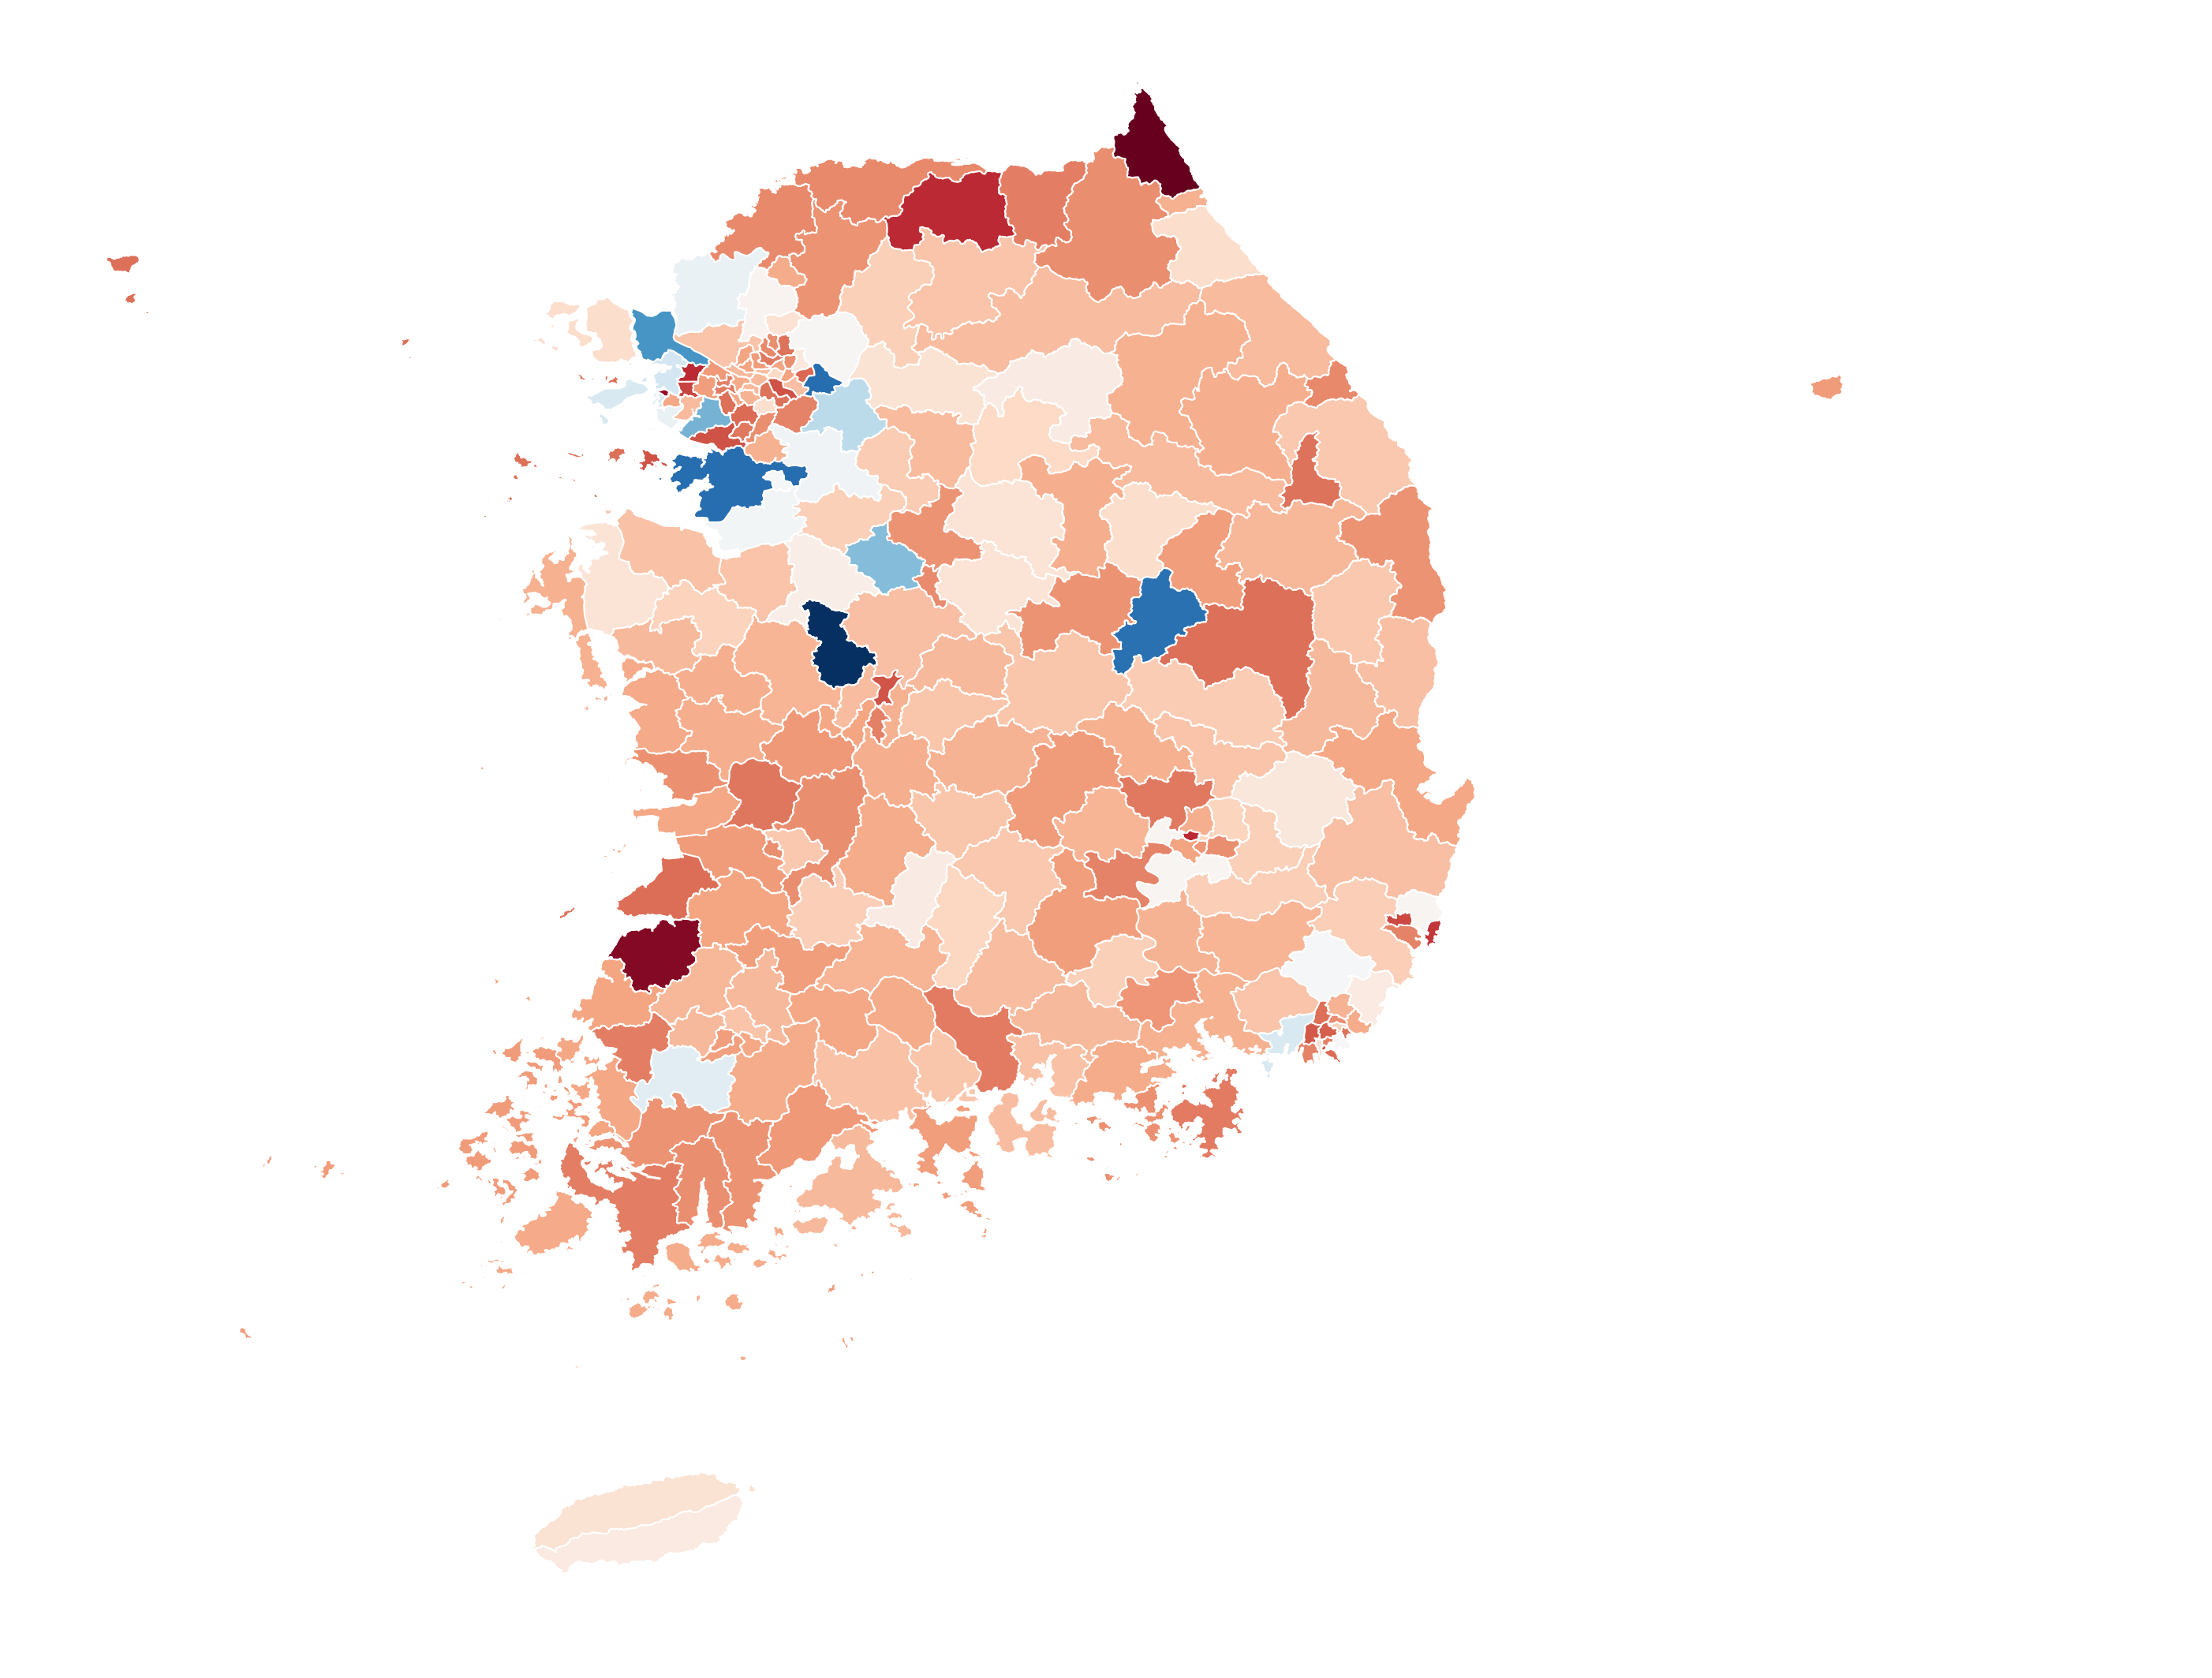

In [349]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

plt.ioff()
year = 2018

year_data = control_val_df.loc[control_val_df['시점']==year].reset_index()
year_data_visu = gpd.GeoDataFrame(pd.merge(sgg_gdf, year_data[['시군구코드','인위인구증가율']], left_on ='SGG_AD_CD', right_on='시군구코드', how='inner'))

# 읍면동 시각화
ax = year_data_visu.plot(
    figsize=(50, 50), column='인위인구증가율', cmap="RdBu")
ax.set_axis_off()

plt.show()